In [217]:

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import json
from networkx.readwrite import json_graph
import pandas as pd

airports = pd.read_csv('airports.csv')
routes = pd.read_csv('routes.csv')

flights  = routes[(routes.dest_airport.isin(airports.iata) & (routes.airport.isin(airports.iata)))]
flights.shape

(67067, 9)

In [234]:
graph = nx.from_pandas_edgelist(flights, source = 'airport', target = 'dest_airport', create_using = nx.DiGraph())

deg = nx.degree(graph)
sizes = [5 * deg[iata] for iata in graph.nodes]

# altitude = airports[['altitude','iata']]
# print(altitude)
# altitude = [altitude[iata] for iata in graph.nodes]

pos = {v['iata']: (v['long'], v['lat'])
       for airport, v in
       airports.to_dict('index').items()}


labels = {iata: iata if deg[iata] >= 20 else ''
                  for iata in graph.nodes}

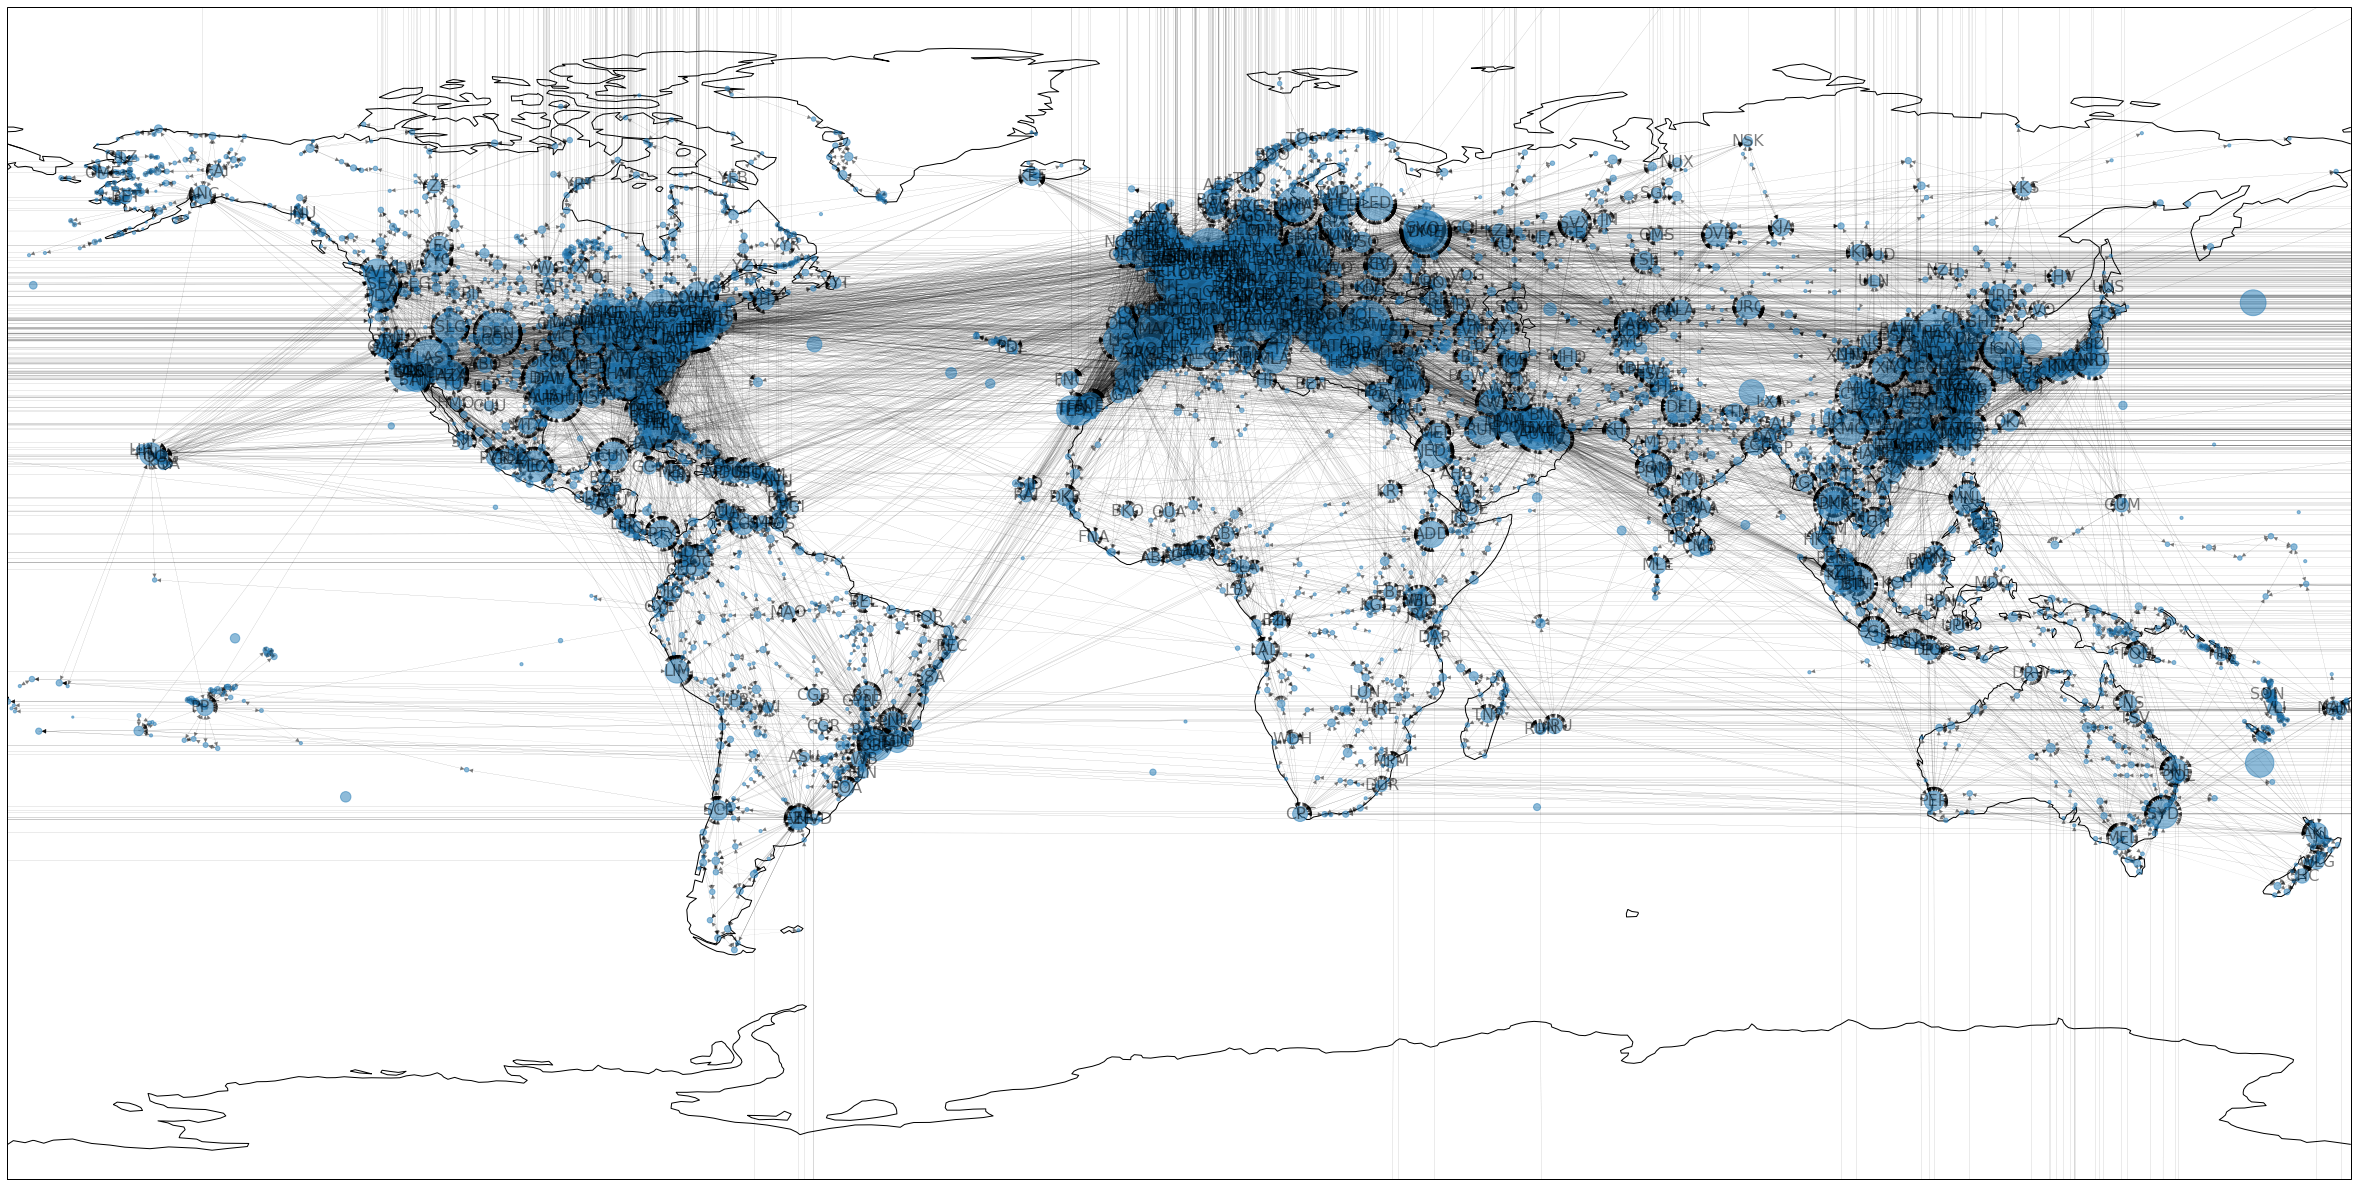

In [235]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt

crs = ccrs.PlateCarree()
fig, ax = plt.subplots(
    1, 1, figsize=(42, 42),
    subplot_kw=dict(projection=crs))
ax.coastlines()
# # Extent of continental US.
#ax.set_extent([-128, -62, 20, 50])
nx.draw_networkx(graph, ax=ax,
                  font_size=16,
                  alpha=.5,
                  width=.075,
                  node_size=sizes,
                  labels=labels,
                  pos=pos,
                  cmap=plt.cm.autumn)